Repository cloned from https://github.com/udacity/ud120-projects.git

In [1]:
import sys
projects_home = '/home/aseem/projects/ud120-projects'
tools_location = projects_home + '/tools/'
sys.path.append(tools_location)
sys.path.append(projects_home + '/choose_your_own')
sys.path.append("/home/aseem/projects/website/udacity_data_science_notes/intro_machine_learning")

%matplotlib inline
    
def show_accuracy(features = None, labels = None):
    from sklearn.metrics import accuracy_score
    
    if features is None:
        features = features_test
        labels = labels_test
    
    acc = accuracy_score(clf.predict(features), labels)
    print acc
    
from time import time
def print_time(name, start_time):
    print "{} time: {}s".format(name, round(time() - start_time, 3))

In [2]:
""" 
    This is the code to accompany the Lesson 1 (Naive Bayes) mini-project. 

    Use a Naive Bayes Classifier to identify emails by their authors
    
    authors and labels:
    Sara has label 0
    Chris has label 1
"""    
from email_preprocess import preprocess

words_file = tools_location + "word_data.pkl"
authors_file = tools_location + "email_authors.pkl"

t0 = time()
features_train, features_test, labels_train, labels_test = preprocess(words_file, authors_file)
print_time("preprocess", t0)

no. of Chris training emails: 7936
no. of Sara training emails: 7884
preprocess time: 3.733s


In [5]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

t0 = time()
clf.fit(features_train, labels_train)
print_time("training", t0)

training time: 0.682s


In [6]:
t0 = time()
show_accuracy()
print_time("predictions", t0)

0.973265073948
predictions time: 0.108s


In [ ]:
#features_train = features_train[:len(features_train)/100] 
#labels_train = labels_train[:len(labels_train)/100] 

In [7]:
""" 
    This is the code to accompany the Lesson 2 (SVM) mini-project.

    Use a SVM to identify emails from the Enron corpus by their authors:    
    Sara has label 0
    Chris has label 1
"""
from sklearn.svm import SVC
clf = SVC(kernel="linear")

t0 = time()
clf.fit(features_train, labels_train)
print_time("training", t0)

training time: 259.466s


In [8]:
t0 = time()
show_accuracy()
print_time("testing", t0)

0.984072810011
testing time: 28.04s


In [9]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf", C=10000.)

t0 = time()
clf.fit(features_train, labels_train)
print_time("training", t0)

training time: 159.823s


In [10]:
t0 = time()
show_accuracy()
print_time("testing", t0)

0.990898748578
testing time: 16.473s


In [7]:
""" 
    This is the code to accompany the Lesson 3 (decision tree) mini-project.

    Use a Decision Tree to identify emails from the Enron corpus by author:    
    Sara has label 0
    Chris has label 1
"""
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split=40)

t0 = time()
clf = clf.fit(features_train, labels_train)
print_time("training", t0)

training time: 31.765s


In [5]:
t0 = time()
show_accuracy()
print_time("accuracy", t0)

0.966439135381
accuracy time: 0.004s


In [3]:
len(features_train[0])

379

The Enron fraud is a big, messy and totally fascinating story about corporate malfeasance of nearly every imaginable type. The Enron email and financial datasets are also big, messy treasure troves of information, which become much more useful once you know your way around them a bit. We’ve combined the email and finance data into a single dataset, which you’ll explore in this mini-project.

In [5]:
import pickle

enron_data = pickle.load(open(projects_home + "/final_project/final_project_dataset.pkl", "r"))

In [6]:
#How many people?
len(enron_data)

146

In [11]:
#How many features for each person?
len(enron_data.values()[0])

21

In [14]:
#how many person of interest?
number_poi = sum(1 for person in enron_data.values() if person['poi'])
number_poi

18

Total POI = 35

There are a few things you could say here, but our main thought is about having enough data to really learn the patterns.  In general, more data is always better--only having 18 data points doesn't give you that many examples to learn from.

In [20]:
#What is the total value of the stock belonging to James Prentice?
enron_data['PRENTICE JAMES']['total_stock_value']

1095040

In [24]:
#How many email messages do we have from Wesley Colwell to persons of interest?
enron_data['Colwell Wesley'.upper()]['from_this_person_to_poi']

11

In [26]:
#What’s the value of stock options exercised by Jeffrey K Skilling?
enron_data['Skilling Jeffrey K'.upper()]['exercised_stock_options']

19250000

In the coming lessons, we’ll talk about how the best features are often motivated by our human understanding of the problem at hand. In this case, that means knowing a little about the story of the Enron fraud.

If you have an hour and a half to spare, “Enron: The Smartest Guys in the Room” is a documentary that gives an amazing overview of the story. Alternatively, there are plenty of archival newspaper stories that chronicle the rise and fall of Enron.

Which of these schemes was Enron not involved in?

- selling assets to shell companies at the end of each month, and buying them back at the beginning of the next month to hide accounting losses
- causing electrical grid failures in California
- illegally obtained a government report that enabled them to corner the market on frozen concentrated orange juice futures
- conspiring to give a Saudi prince expedited American citizenship
- a plan in collaboration with Blockbuster movies to stream movies over the internet


In [31]:
for name in ['LAY KENNETH L', 'SKILLING JEFFREY K', 'FASTOW ANDREW S']:
    print name
    print enron_data[name]['total_payments']

LAY KENNETH L
103559793
SKILLING JEFFREY K
8682716
FASTOW ANDREW S
2424083


In [36]:
enron_data['LAY KENNETH L']

{'bonus': 7000000,
 'deferral_payments': 202911,
 'deferred_income': -300000,
 'director_fees': 'NaN',
 'email_address': 'kenneth.lay@enron.com',
 'exercised_stock_options': 34348384,
 'expenses': 99832,
 'from_messages': 36,
 'from_poi_to_this_person': 123,
 'from_this_person_to_poi': 16,
 'loan_advances': 81525000,
 'long_term_incentive': 3600000,
 'other': 10359729,
 'poi': True,
 'restricted_stock': 14761694,
 'restricted_stock_deferred': 'NaN',
 'salary': 1072321,
 'shared_receipt_with_poi': 2411,
 'to_messages': 4273,
 'total_payments': 103559793,
 'total_stock_value': 49110078}

In [47]:
#How many folks in this dataset have a quantified salary?
print len(filter(lambda x: x['salary'] != 'NaN', enron_data.values()))

# What about a known email address?
print len(filter(lambda x: x['email_address'] != 'NaN', enron_data.values()))

95
111


In [54]:
with_nan = len(filter(lambda x: x['total_payments'] == 'NaN', enron_data.values()))

print with_nan

with_nan / float(len(enron_data.values()))

21


0.14383561643835616

In [57]:
poi = filter(lambda x: x['poi'], enron_data.values())

poi_with_nan = len(filter(lambda x: x['total_payments'] == 'NaN', poi))

print len(poi)

poi_with_nan / float(len(enron_data.values()))

18


0.0

In [53]:
len(enron_data.values())

146

## Regression

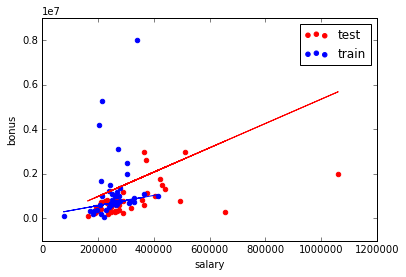

In [30]:
import pickle
from feature_format import featureFormat, targetFeatureSplit
from sklearn.linear_model import LinearRegression

dictionary = pickle.load( open(projects_home + "/final_project/final_project_dataset_modified.pkl", "r") )

def do_regression(features_list):
    ### list the features you want to look at--first item in the 
    ### list will be the "target" feature
    
    data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
    target, features = targetFeatureSplit( data )

    from sklearn.cross_validation import train_test_split
    feature_train, feature_test, target_train, target_test = train_test_split(
        features, target, test_size=0.5, random_state=42)
    train_color = "b"
    test_color = "r"

    reg = LinearRegression()
    reg.fit(feature_train, target_train)

    ### draw the scatterplot, with color-coded training and testing points
    import matplotlib.pyplot as plt
    for feature, target in zip(feature_test, target_test):
        plt.scatter( feature, target, color=test_color ) 
    for feature, target in zip(feature_train, target_train):
        plt.scatter( feature, target, color=train_color ) 

    ### labels for the legend
    plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
    plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

    ### draw the regression line, once it's coded
    try:
        plt.plot( feature_test, reg.predict(feature_test), color = test_color )
    except NameError:
        pass
    
    
    ###############
    # Added later
    ###############
    reg.fit(feature_test, target_test)
    plt.plot(feature_train, reg.predict(feature_train), color= train_color) 
    
    plt.xlabel(features_list[1])
    plt.ylabel(features_list[0])
    plt.legend()
    plt.show()
    
    return reg, feature_train, feature_test, target_train, target_test
    
reg, feature_train, feature_test, target_train, target_test = do_regression(["bonus", "salary"])

In [31]:
def show_statistics(reg):
    print reg.coef_
    print reg.intercept_
    print reg.score(feature_train, target_train)
    print reg.score(feature_test, target_test)
    
show_statistics(reg)

[ 2.27410114]
124444.388866
-0.123597985403
0.251488150398


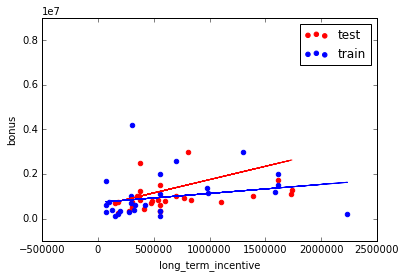

[ 0.40364065]
723040.817416
0.0741662130399
0.0939176474328


In [32]:
reg, feature_train, feature_test, target_train, target_test = do_regression(["bonus", "long_term_incentive"])
show_statistics(reg)

# Outliers

In the first part, you will run a regression, and identify and remove the 10% of points that have the largest residual errors. Then you’ll remove those outliers from the dataset and refit the regression, just like the strategy that Sebastian suggested in the lesson videos.

In the second part, you will get acquainted with some of the outliers in the Enron finance data, and learn if/how to remove them.

---
Start by running the starter code (outliers/outlier_removal_regression.py) and visualizing the points. A few outliers should clearly pop out. Deploy a linear regression, where net worth is the target and the feature being used to predict it is a person’s age (remember to train on the training data!).

The “correct” slope for the main body of data points is 6.25 (we know this because we used this value to generate the data); what slope does your regression have?

---
In outliers/outlier_cleaner.py, you will find the skeleton for a function called outlierCleaner() that you will fill in with a cleaning algorithm. It takes three arguments: predictions is a list of predicted targets that come from your regression, ages is the list of ages in the training set, and net_worths is the actual value of the net worths in the training set. There should be 90 elements in each of these lists (because the training set has 90 points in it). Your job is to return a list called cleaned_data that has only 81 elements in it, which are the 81 training points where the predictions and the actual values (net_worths) have the smallest errors (90 * 0.9 = 81). The format of cleaned_data should be a list of tuples, where each tuple has the form (age, net_worth, error). 

slope is [[ 5.07793064]]
score test data is 0.878262470366


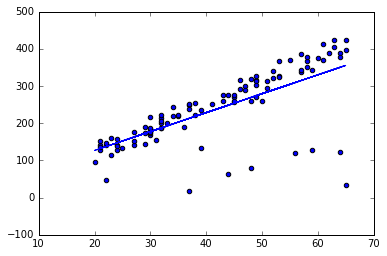

slope is [[ 6.36859481]]
score test data is 0.983189455396


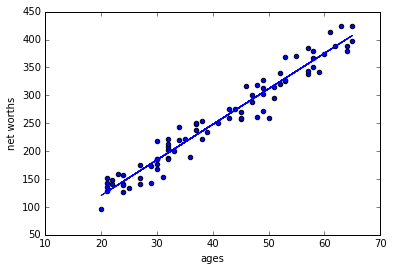

In [25]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LinearRegression

outliers_path = projects_home + "/outliers/"
sys.path.append(outliers_path)

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    for prediction, age, net_worth in zip(predictions, ages, net_worths):
        current = (age[0], net_worth[0], abs(prediction - net_worth)[0])
        cleaned_data.append(current)
    
    cleaned_data.sort(key=lambda x: x[2])
    
    number_elements = len(cleaned_data)
    to_keep = int(number_elements * 0.9)
    
    return cleaned_data[:to_keep]


### load up some practice data with outliers in it
ages = pickle.load( open(outliers_path + "practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open(outliers_path + "practice_outliers_net_worths.pkl", "r") )

ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(
    ages, net_worths, test_size=0.1, random_state=42)

reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

print "slope is {}".format(reg.coef_)
print "score test data is {}".format(reg.score(ages_test, net_worths_test))

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        
        print "slope is {}".format(reg.coef_)
        print "score test data is {}".format(reg.score(ages_test, net_worths_test))
        
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

You can find the starter code in outliers/enron_outliers.py, which reads in the data (in dictionary form) and converts it into a sklearn-ready numpy array. Since there are two features being extracted from the dictionary (“salary” and “bonus”), the resulting numpy array will be of dimension N x 2, where N is the number of data points and 2 is the number of features. This is perfect input for a scatterplot; we’ll use the matplotlib.pyplot module to make that plot. (We’ve been using pyplot for all the visualizations in this course.) Add these lines to the bottom of the script to make your scatterplot:



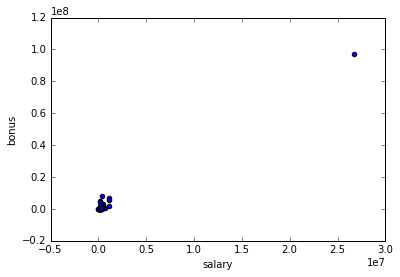

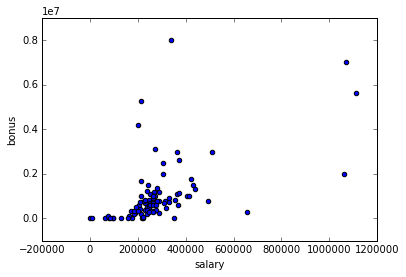

In [30]:
import pickle
import sys
import matplotlib.pyplot
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open(projects_home + "/final_project/final_project_dataset.pkl", "r") )

def make_plot():
    features = ["salary", "bonus"]
    data = featureFormat(data_dict, features)

    for point in data:
        salary = point[0]
        bonus = point[1]
        matplotlib.pyplot.scatter( salary, bonus )

    matplotlib.pyplot.xlabel("salary")
    matplotlib.pyplot.ylabel("bonus")
    matplotlib.pyplot.show()
    
make_plot()
data_dict.pop("TOTAL", 0)
make_plot()

# Clustering

In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.


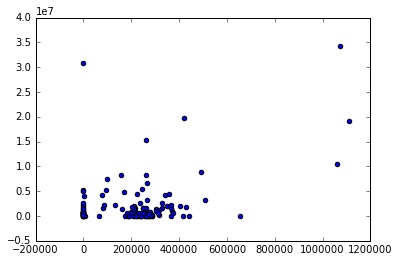

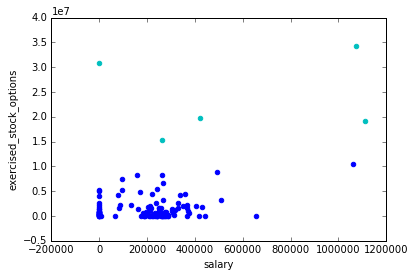

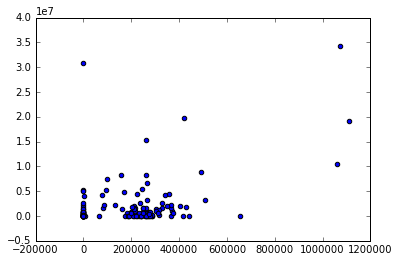

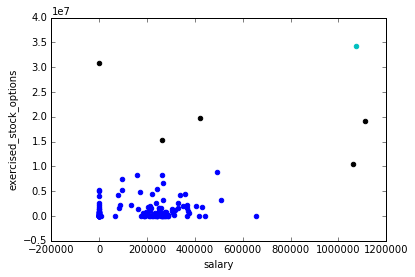

In [3]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import KMeans

from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    #plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open(projects_home + "/final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


def main(num):
    
    ### the input features we want to use 
    ### can be any key in the person-level dictionary (salary, director_fees, etc.) 
    feature_1 = "salary"
    feature_2 = "exercised_stock_options"
    feature_3 = "total_payments"
    poi  = "poi"
    
    if num == 2:
        features_list = [poi, feature_1, feature_2]
    else:
        features_list = [poi, feature_1, feature_2, feature_3]

    data = featureFormat(data_dict, features_list )
    poi, finance_features = targetFeatureSplit( data )
    
    ### in the "clustering with 3 features" part of the mini-project,
    ### you'll want to change this line to 
    ### for f1, f2, _ in finance_features:
    ### (as it's currently written, the line below assumes 2 features)
    if num == 2:
        for f1, f2 in finance_features:
            plt.scatter( f1, f2 )
    else:
        for f1, f2, _ in finance_features:
            plt.scatter( f1, f2 )
    plt.show()

    ### cluster here; create predictions of the cluster labels
    ### for the data and store them to a list called pred

    pred = KMeans(n_clusters=num).fit_predict(finance_features)


    ### rename the "name" parameter when you change the number of features
    ### so that the figure gets saved to a different file
    try:
        Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
    except NameError:
        print "no predictions object named pred found, no clusters to plot"
        
main(2)
main(3)

In [22]:
exercised_stock_options_all = [value['exercised_stock_options'] for value in data_dict.values()]
exercised_stock_options_ints = filter(lambda x: type(x) == type(1), exercised_stock_options_all)

print min(exercised_stock_options_ints)
print max(exercised_stock_options_ints)

3285
34348384


In [23]:
salary_all = [value['salary'] for value in data_dict.values()]
salary_ints = filter(lambda x: type(x) == type(1) and x != 0, salary_all)

print min(salary_ints)
print max(salary_ints)

477
1111258


# Feature Scaling

In the last project, you performed k-means clustering on the Enron characters using their financial data as inputs. We’ll update that work to include scaled features, to see how that changes things.

In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def to_float(arr):
    return map(lambda x: [float(x)], arr)

scaler = MinMaxScaler().fit(np.array(to_float(exercised_stock_options_ints)))
print scaler.transform(np.array([[1000000]]))

scaler = MinMaxScaler().fit(np.array(to_float(salary_ints)))
print scaler.transform(np.array([[200000]]))

[[ 0.02902059]]
[[ 0.17962407]]


# Text Learning

In the beginning of this class, you identified emails by their authors using a number of supervised classification algorithms. In those projects, we handled the preprocessing for you, transforming the input emails into a TfIdf so they could be fed into the algorithms. Now you will construct your own version of that preprocessing step, so that you are going directly from raw data to processed features.

You will be given two text files: one contains the locations of all the emails from Sara, the other has emails from Chris. You will also have access to the parseOutText() function, which accepts an opened email as an argument and returns a string containing all the (stemmed) words in the email.


You’ll start with a warmup exercise to get acquainted with parseOutText(). Go to the tools directory and run parse_out_email_text.py, which contains parseOutText() and a test email to run this function over.

parseOutText() takes the opened email and returns only the text part, stripping away any metadata that may occur at the beginning of the email, so what's left is the text of the message. We currently have this script set up so that it will print the text of the email to the screen, what is the text that you get when you run parseOutText()?

In [5]:
from nltk.stem.snowball import SnowballStemmer
import string

def parseOutText(f):
    """ given an opened email file f, parse out all text below the
        metadata block at the top
        (in Part 2, you will also add stemming capabilities)
        and return a string that contains all the words
        in the email (space-separated) 
        
        example use case:
        f = open("email_file_name.txt", "r")
        text = parseOutText(f)
        
        """


    f.seek(0)  ### go back to beginning of file (annoying)
    all_text = f.read()

    ### split off metadata
    content = all_text.split("X-FileName:")
    words = ""
    words_list = []
    if len(content) > 1:
        stemmer = SnowballStemmer("english")
        ### remove punctuation
        text_string = content[1].translate(string.maketrans("", ""), string.punctuation)

        ### project part 2: comment out the line below
        #words = text_string

        ### split the text string into individual words, stem each word,
        ### and append the stemmed word to words (make sure there's a single
        ### space between each stemmed word)
        for word in text_string.split():
            words_list.append(stemmer.stem(word))
                              
    return (" ".join(words_list).replace("  ", " "))

                              
ff = open(projects_home + "/text_learning/test_email.txt", "r")
text = parseOutText(ff)
print text

hi everyon if you can read this messag your proper use parseouttext pleas proceed to the next part of the project


In vectorize_text.py, you will iterate through all the emails from Chris and from Sara. For each email, feed the opened email to parseOutText() and return the stemmed text string. Then do two things:

- remove signature words (“sara”, “shackleton”, “chris”, “germani”--bonus points if you can figure out why it's "germani" and not "germany")
- append the updated text string to word_data -- if the email is from Sara, append 0 (zero) to from_data, or append a 1 if Chris wrote the email.

Once this step is complete, you should have two lists: one contains the stemmed text of each email, and the second should contain the labels that encode (via a 0 or 1) who the author of that email is.

Running over all the emails can take a little while (5 minutes or more), so we've added a temp_counter to cut things off after the first 200 emails. Of course, once everything is working, you'd want to run over the full dataset.

In [66]:
import os
import pickle
import re
import sys


from_sara  = open(projects_home + "/text_learning/from_sara.txt", "r")
from_chris = open(projects_home + "/text_learning/from_chris.txt", "r")

from_data = []
word_data = []

### temp_counter is a way to speed up the development--there are
### thousands of emails from Sara and Chris, so running over all of them
### can take a long time
### temp_counter helps you only look at the first 200 emails in the list so you
### can iterate your modifications quicker
temp_counter = 0

for name, from_person in [("sara", from_sara), ("chris", from_chris)]:
    for path in from_person:
        ### only look at first 200 emails when developing
        ### once everything is working, remove this line to run over full dataset
        temp_counter += 1
        if True:
            path = os.path.join(projects_home, path[:-1])
            #print path
            email = open(path, "r")

            ### use parseOutText to extract the text from the opened email
            text = parseOutText(email)

            ### use str.replace() to remove any instances of the words
            #for word in ["sara", "shackleton", "chris", "germani"]:
            # used in feature selection. otherwise use above
            for word in ["sara", "shackleton", "chris", "germani", "sshacklensf", "cgermannsf"]:
            #for word in ["sara", "shackleton", "chris", "germani", "sshacklensf", "cgermannsf",
            #            "houectect", "houect", "houston", "fax", "forward", "1400"]:
                text = text.replace(word, "")
            
            ### append the text to word_data
            word_data.append(text)

            ### append a 0 to from_data if email is from Sara, and 1 if email is from Chris
            from_data.append(0 if name == 'sara' else 1)


            email.close()

print "emails processed"
from_sara.close()
from_chris.close()

pickle.dump( word_data, open("your_word_data.pkl", "w") )
pickle.dump( from_data, open("your_email_authors.pkl", "w") )

emails processed


In [43]:
word_data[152]

u'tjonesnsf stephani and sam need nymex calendar'

In [44]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = "english")

X = vectorizer.fit_transform(word_data)
len(vectorizer.get_feature_names())

38757

In [46]:
vectorizer.get_feature_names()[34597]

u'stephaniethank'

# Feature Selection

The mark of a good machine learner is not that they don't make mistakes but that they are always on the lookout to check this and figure out whether there is a bug and need to go in and fix.

Katie explained in a video a problem that arose in preparing Chris and Sara’s email for the author identification project; it had to do with a feature that was a little too powerful (effectively acting like a signature, which gives an arguably unfair advantage to an algorithm). You’ll work through that discovery process here.


In [67]:
sys.path.append(projects_home + "/feature_selection")

import pickle
import numpy
numpy.random.seed(42)


### The words (features) and authors (labels), already largely processed.
### These files should have been created from the previous (Lesson 10)
### mini-project.
words_file = "./your_word_data.pkl" 
authors_file = "./your_email_authors.pkl"
word_data = pickle.load( open(words_file, "r"))
authors = pickle.load( open(authors_file, "r") )


### test_size is the percentage of events assigned to the test set (the
### remainder go into training)
### feature matrices changed to dense representations for compatibility with
### classifier functions in versions 0.15.2 and earlier
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(
    word_data, authors, test_size=0.1, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                             stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test  = vectorizer.transform(features_test).toarray()

In [68]:
### a classic way to overfit is to use a small number
### of data points and a large number of features;
### train on only 150 events to put ourselves in this regime
features_train2 = features_train[:150]
labels_train2   = labels_train[:150]

from sklearn import tree

### your code goes here
clf = tree.DecisionTreeClassifier()

t0 = time()
clf = clf.fit(features_train2, labels_train2)
print_time("training", t0)

t0 = time()
show_accuracy()
print_time("accuracy", t0)

training time: 0.03s
0.816837315131
accuracy time: 0.129s


We would expect the accuracy to be low but it is not

Take your (overfit) decision tree and use the featureimportances attribute to get a list of the relative importance of all the features being used. We suggest iterating through this list (it’s long, since this is text data) and only printing out the feature importance if it’s above some threshold (say, 0.2--remember, if all words were equally important, each one would give an importance of far less than 0.01). What’s the importance of the most important feature? What is the number of this feature?
SKIP TO QUIZ

In [64]:
for i, feature_importance in enumerate(clf.feature_importances_):
    if feature_importance > 0.2:
        print i, feature_importance

33403 0.219512195122


In [35]:
vectorizer.get_feature_names()[33614]

u'sshacklensf'

In [40]:
vectorizer.get_feature_names()[14343]

u'cgermannsf'

In [45]:
vectorizer.get_feature_names()[21323]

u'houectect'

In [50]:
print vectorizer.get_feature_names()[21150]
print vectorizer.get_feature_names()[21163]

houect
houston


In [55]:
print vectorizer.get_feature_names()[18681]
print vectorizer.get_feature_names()[19177]

fax
forward


In [60]:
print vectorizer.get_feature_names()[3667]

1400


## PCA

Our discussion of PCA spent a lot of time on theoretical issues, so in this mini-project we’ll ask you to play around with some sklearn code. The eigenfaces code is interesting and rich enough to serve as the testbed for this entire mini-project.

The starter code can be found in pca/eigenfaces.py. This was mostly taken from the example found here, on the sklearn documentation.
Take note when running the code, that there are changes in one of the parameters for the SVC function called on line 94 of pca/eigenfaces.py. For the 'class_weight' parameter, the argument string "auto" is a valid value for sklearn version 0.16 and prior, but will be depreciated by 0.19. If you are running sklearn version 0.17 or later, the expected argument string should be "balanced". If you get an error or warning when running pca/eigenfaces.py, make sure that you have the correct argument on line 98 that matches your installed version of sklearn.


In [2]:
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html

"""

from time import time
import logging
import pylab as pl
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

In [3]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces
done in 0.930s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.033s
Fitting the classifier to the training set
done in 19.957s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting the people names on the testing set
done in 0.059s
                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.62      0.70        13
     Colin Powell       0.81      0.92      0.86        60
  Donald Rumsfeld       0.88      0.78      0.82        27
    George W Bush       0.83      0.96      0.89       146
Gerhard Schroeder       0.89      0.64      0.74        25
      Hugo Chavez       1.00      0.33      0.50

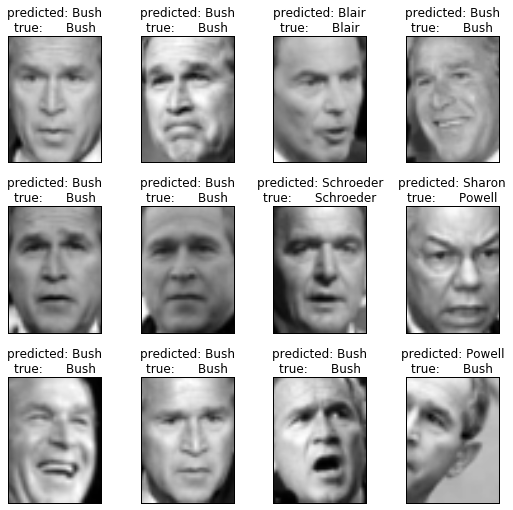

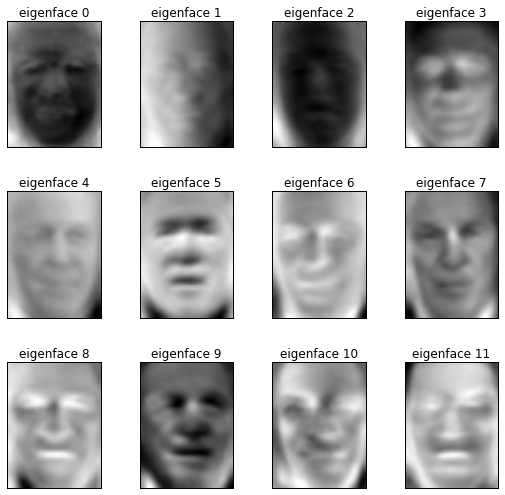

In [4]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

# for machine learning we use the data directly (as relative pixel
# position info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print "Total dataset size:"
print "n_samples: %d" % n_samples
print "n_features: %d" % n_features
print "n_classes: %d" % n_classes


###############################################################################
# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

###############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print "done in %0.3fs" % (time() - t0)

eigenfaces = pca.components_.reshape((n_components, h, w))

print "Projecting the input data on the eigenfaces orthonormal basis"
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print "done in %0.3fs" % (time() - t0)


###############################################################################
# Train a SVM classification model

print "Fitting the classifier to the training set"
t0 = time()
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
# for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_


###############################################################################
# Quantitative evaluation of the model quality on the test set

print "Predicting the people names on the testing set"
t0 = time()
y_pred = clf.predict(X_test_pca)
print "done in %0.3fs" % (time() - t0)

print classification_report(y_test, y_pred, target_names=target_names)
print confusion_matrix(y_test, y_pred, labels=range(n_classes))


###############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

pl.show()

In [11]:
#Explained Variance of Each PC
pca.explained_variance_ratio_

array([ 0.19173275,  0.15217443,  0.07157025,  0.05997841,  0.05130248,
        0.02966335,  0.02391508,  0.02162205,  0.01997067,  0.01939669,
        0.01636443,  0.01470878,  0.01265872,  0.0111059 ,  0.01094808,
        0.00993588,  0.00924158,  0.00862995,  0.00813523,  0.00727846,
        0.006677  ,  0.00658203,  0.00607794,  0.00593598,  0.00546743,
        0.00538324,  0.00522125,  0.00499136,  0.00441466,  0.0040963 ,
        0.00397091,  0.00372287,  0.0036236 ,  0.00350013,  0.00340167,
        0.00327627,  0.00312794,  0.00300224,  0.00293578,  0.00285956,
        0.00277378,  0.00274109,  0.00260547,  0.00258805,  0.00246422,
        0.00244279,  0.00233921,  0.00226363,  0.00219478,  0.00217666,
        0.00210697,  0.00202834,  0.00198283,  0.00195592,  0.0019433 ,
        0.00185149,  0.00181138,  0.00178381,  0.00175889,  0.00172586,
        0.00164681,  0.00157213,  0.00155381,  0.00153586,  0.0014806 ,
        0.00146146,  0.00143823,  0.00141158,  0.00138415,  0.00

Now you'll experiment with keeping different numbers of principal components. In a multiclass classification problem like this one (more than 2 labels to apply), accuracy is a less-intuitive metric than in the 2-class case. Instead, a popular metric is the F1 score.

We’ll learn about the F1 score properly in the lesson on evaluation metrics, but you’ll figure out for yourself whether a good classifier is characterized by a high or low F1 score. You’ll do this by varying the number of principal components and watching how the F1 score changes in response.

As you add more principal components as features for training your classifier, do you expect it to get better or worse performance?
SKIP TO QUIZ


doing for n_components 10
Extracting the top 10 eigenfaces from 966 faces
done in 0.063s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.011s
Fitting the classifier to the training set
done in 71.574s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting the people names on the testing set
done in 0.021s
                   precision    recall  f1-score   support

     Ariel Sharon       0.07      0.15      0.10        13
     Colin Powell       0.39      0.47      0.42        60
  Donald Rumsfeld       0.28      0.26      0.27        27
    George W Bush       0.67      0.62      0.64       146
Gerhard Schroeder       0.21      0.20      0.20        25
      Hugo Chavez       0.27      0.27      0.27        15
       Tony Blair       0.33    

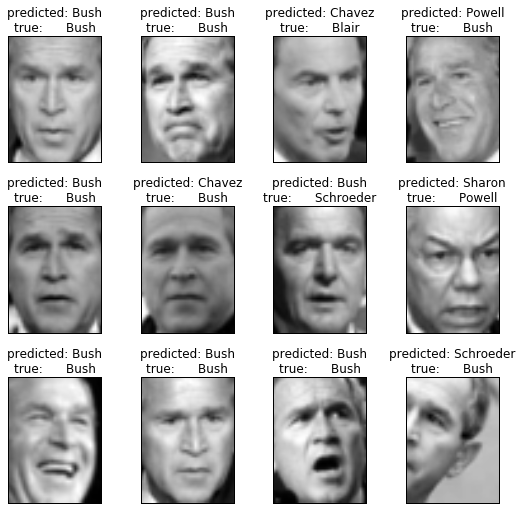

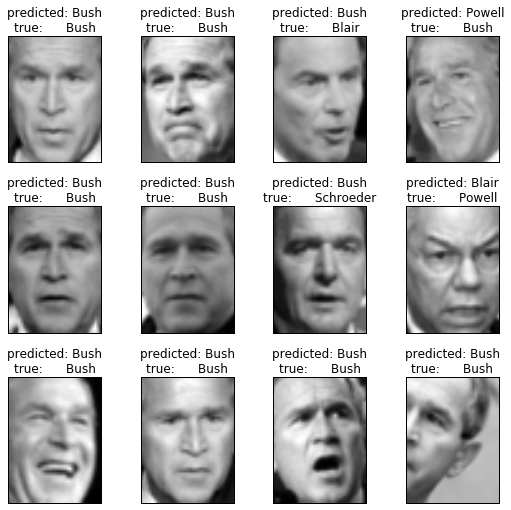

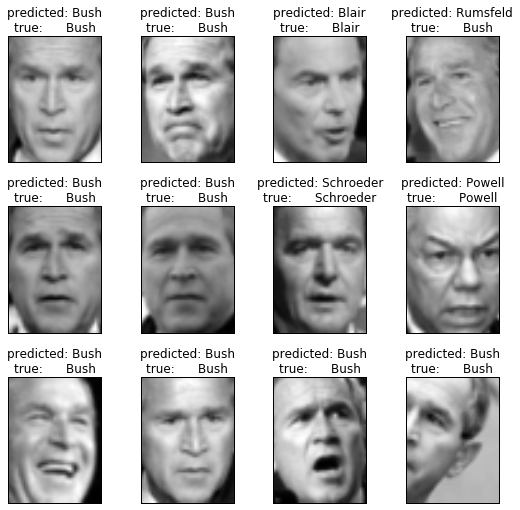

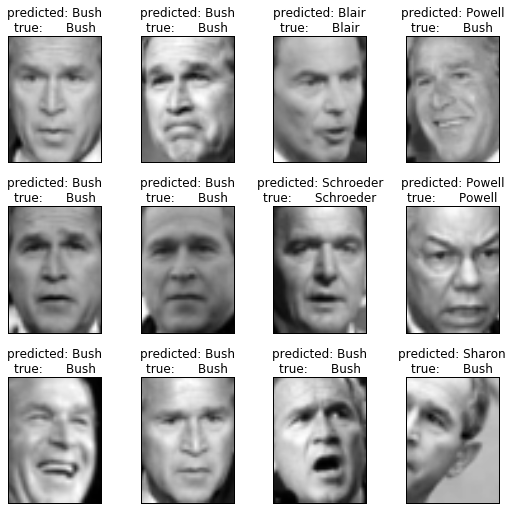

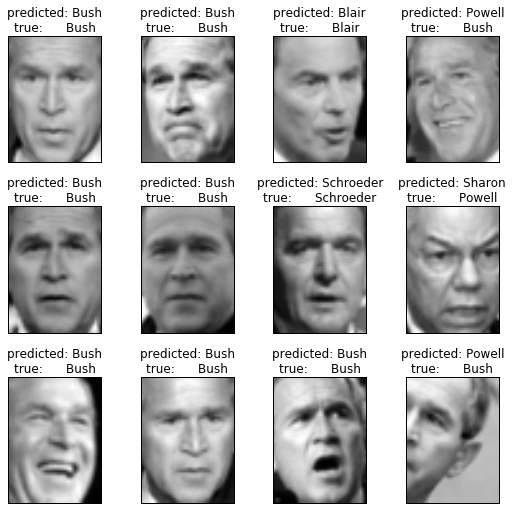

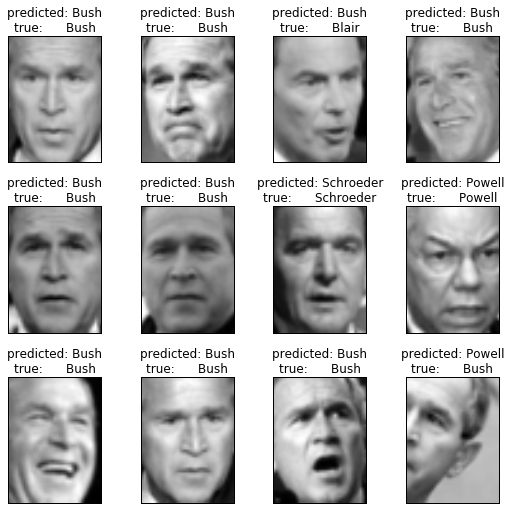

In [16]:
for n_components in [10, 15, 25, 50, 100, 250]:

    print "doing for n_components {}".format(n_components)
    
    print "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
    t0 = time()
    pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
    print "done in %0.3fs" % (time() - t0)

    eigenfaces = pca.components_.reshape((n_components, h, w))

    print "Projecting the input data on the eigenfaces orthonormal basis"
    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print "done in %0.3fs" % (time() - t0)


    ###############################################################################
    # Train a SVM classification model

    print "Fitting the classifier to the training set"
    t0 = time()
    param_grid = {
             'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              }
    # for sklearn version 0.16 or prior, the class_weight parameter value is 'auto'
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(X_train_pca, y_train)
    print "done in %0.3fs" % (time() - t0)
    print "Best estimator found by grid search:"
    print clf.best_estimator_


    ###############################################################################
    # Quantitative evaluation of the model quality on the test set

    print "Predicting the people names on the testing set"
    t0 = time()
    y_pred = clf.predict(X_test_pca)
    print "done in %0.3fs" % (time() - t0)

    print classification_report(y_test, y_pred, target_names=target_names)
    print confusion_matrix(y_test, y_pred, labels=range(n_classes))
    
    prediction_titles = [title(y_pred, y_test, target_names, i)
                             for i in range(y_pred.shape[0])]

    plot_gallery(X_test, prediction_titles, h, w)

## Validation

In this mini-project, you’ll start from scratch in making a training-testing split in the data. This will be the first step toward your final project, of building a POI identifier.

You’ll start by building the simplest imaginable (unvalidated) POI identifier. The starter code (`validation/validate_poi.py`) for this lesson is pretty bare--all it does is read in the data, and format it into lists of labels and features. Create a decision tree classifier (just use the default parameters), train it on all the data (you will fix this in the next part!), and print out the accuracy. THIS IS AN OVERFIT TREE, DO NOT TRUST THIS NUMBER! Nonetheless, what’s the accuracy?

In [42]:
#!/usr/bin/python


"""
    Starter code for the validation mini-project.
    The first step toward building your POI identifier!

    Start by loading/formatting the data

    After that, it's not our code anymore--it's yours!
"""

import pickle
from feature_format import featureFormat, targetFeatureSplit

data_dict = pickle.load(open(projects_home + "/final_project/final_project_dataset.pkl", "r") )

### first element is our labels, any added elements are predictor
### features. Keep this the same for the mini-project, but you'll
### have a different feature list when you do the final project.
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)



### it's all yours from here forward!  
from sklearn import tree

clf = tree.DecisionTreeClassifier()

t0 = time()
clf = clf.fit(features, labels)
print_time("training", t0)

t0 = time()
show_accuracy(features, labels)
print_time("accuracy", t0)

training time: 0.001s
0.989473684211
accuracy time: 0.001s


Now you’ll add in training and testing, so that you get a trustworthy accuracy number. Use the `train_test_split` validation available in `sklearn.cross_validation`; hold out 30% of the data for testing and set the random_state parameter to 42 (random_state controls which points go into the training set and which are used for testing; setting it to 42 means we know exactly which events are in which set, and can check the results you get). What’s your updated accuracy?

In [12]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=42)

### it's all yours from here forward!  
from sklearn import tree

clf = tree.DecisionTreeClassifier()

t0 = time()
clf = clf.fit(features_train, labels_train)
print_time("training", t0)

t0 = time()
show_accuracy()
print_time("accuracy", t0)

training time: 0.001s
0.724137931034
accuracy time: 0.001s


# Evalutation Metrics

Go back to your code from the last lesson, where you built a simple first iteration of a POI identifier using a decision tree and one feature. Copy the POI identifier that you built into the skeleton code in evaluation/evaluate_poi_identifier.py. Recall that at the end of that project, your identifier had an accuracy (on the test set) of 0.724. Not too bad, right? Let’s dig into your predictions a little more carefully.


In [3]:
import pickle
from feature_format import featureFormat, targetFeatureSplit

data_dict = pickle.load(open(projects_home + "/final_project/final_project_dataset.pkl", "r") )

### first element is our labels, any added elements are predictor
### features. Keep this the same for the mini-project, but you'll
### have a different feature list when you do the final project.
features_list = ["poi", "salary"]

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=42)

### it's all yours from here forward!  
from sklearn import tree

clf = tree.DecisionTreeClassifier()

t0 = time()
clf = clf.fit(features_train, labels_train)
print_time("training", t0)

t0 = time()
show_accuracy()
print_time("accuracy", t0)

training time: 0.0s
0.724137931034
accuracy time: 0.0s


How many POIs are predicted for the test set for your POI identifier?

(Note that we said test set! We are not looking for the number of POIs in the whole dataset.)

In [6]:
sum(clf.predict(features_test))

4.0

In [7]:
#How many people total are in your test set?
len(features_test)

29

In [12]:
#If your identifier predicted 0. (not POI) for everyone in the test set, what would its accuracy be?
sum(1 for i in labels_test if i == 0) / float(len(labels_test))

0.8620689655172413

Look at the predictions of your overfit model and compare them to the true test labels. Do you get any true positives? (In this case, we define a true positive as a case where both the actual label and the predicted label are 1)

In [43]:
true_positives = 0
for prediction, actual in zip(clf.predict(features_test), labels_test):
    if prediction == actual == 1:
        true_positives += 1

print(true_positives)

3


As you may now see, having imbalanced classes like we have in the Enron dataset (many more non-POIs than POIs) introduces some special challenges, namely that you can just guess the more common class label for every point, not a very insightful strategy, and still get pretty good accuracy!

Precision and recall can help illuminate your performance better. Use the precision_score and recall_score available in sklearn.metrics to compute those quantities.

What’s the precision?
What’s the recall? 

In [6]:
def get_stats(predictions, actuals):
    true_negatives = 0
    true_positives = 0
    false_negatives = 0
    false_positives = 0
    for prediction, actual in zip(predictions, actuals):
        if actual == 0 and prediction == 0:
            true_negatives += 1
        if actual == 1 and prediction == 1:
            true_positives += 1
        if actual == 1 and prediction == 0:
            false_negatives += 1
        if actual == 0 and prediction == 1:
            false_positives += 1
    
    precision = float(true_positives) / (true_positives + false_positives)
    recall = float(true_positives) / (true_positives + false_negatives)
    
    return true_negatives, true_positives, false_negatives, false_positives, precision, recall

def display_stats(predictions, actuals):

    true_negatives, true_positives, false_negatives, false_positives, precision, recall = get_stats(
        predictions, actuals)
    
    print("true_negatives {}".format(true_negatives))
    print("true_positives {}".format(true_positives))
    print("false_negatives {}".format(false_negatives))
    print("false_positives {}".format(false_positives))
    print("precision is {}".format(precision))
    print("recall is {}".format(recall))

display_stats(clf.predict(features_test), labels_test)

true_negatives 21
true_positives 0
false_negatives 4
false_positives 4
precision is 0.0
recall is 0.0


(Note: you may see a message like UserWarning: The precision and recall are equal to zero for some labels. Just like the message says, there can be problems in computing other metrics (like the F1 score) when precision and/or recall are zero, and it wants to warn you when that happens.) 

Obviously this isn’t a very optimized machine learning strategy (we haven’t tried any algorithms besides the decision tree, or tuned any parameters, or done any feature selection), and now seeing the precision and recall should make that much more apparent than the accuracy did.

In the final project you’ll work on optimizing your POI identifier, using many of the tools learned in this course. Hopefully one result will be that your precision and/or recall will go up, but then you’ll have to be able to interpret them. 

Here are some made-up predictions and true labels for a hypothetical test set; fill in the following boxes to practice identifying true positives, false positives, true negatives, and false negatives. Let’s use the convention that “1” signifies a positive result, and “0” a negative. 


In [7]:
predictions = [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1] 
true_labels = [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

display_stats(predictions, true_labels)

true_negatives 9
true_positives 6
false_negatives 2
false_positives 3
precision is 0.666666666667
recall is 0.75


- My true positive rate is high which means that when a POI is present in the test data, I am good at flagging him
- My identifier doesn’t have great precision, but it does have good recall. That means that, nearly every time a POI shows up in my test set, I am able to identify him or her. The cost of this is that I sometimes get some false positives, where non-POIs get flagged.
- My identifier doesn’t have great recall, but it does have good precision. That means that whenever a POI gets flagged in my test set, I know with a lot of confidence that it’s very likely to be a real POI and not a false alarm. On the other hand, the price I pay for this is that I sometimes miss real POIs, since I’m effectively reluctant to pull the trigger on edge cases.
- My identifier has a really great F1 Score. This is the best of both worlds. Both my false positive and false negative rates are low, which means that I can identify POI’s reliably and accurately. If my identifier finds a POI then the person is almost certainly a POI, and if the identifier does not flag someone, then they are almost certainly not a POI.

There’s usually a tradeoff between precision and recall--which one do you think is more important in your POI identifier? There’s no right or wrong answer, there are good arguments either way, but you should be able to interpret both metrics and articulate which one you find most important and why.
